<a href="https://colab.research.google.com/github/mayconbaptista/IC-RedesDomesticas/blob/main/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes domesticas

O detecção de anomalias em redes domesticas é um projeto de iniciação cientifica que visa a validação dos melhores algoritmos para criação de um modelo de detecção de anomalias em redes domesticas usando aprendizado supervisionado afim de adicionar uma camada a mais de segurança em trafego domestico.

Para essa solução usarei a metodologia CRISP-DM.
Por que essa metodologia?.
* Organização.
* Planeijamento.
* Independe do tipo de projeto.

**Etapas da metodologia**.

1. Etapa - **Entendimento do negócio**.
* Objetivos do projéto.
* Critérios de sucesso.
* Recursos e contingenciamentos.
* Objetivos do data mining.
* Planeijamento estrutural.
2. Etapa - **Entendimento dos dados**.
* Coleta.
* Descrição.
* Exploração.
* Verificação da qualidade dos dados.
3. Etapa - **Preparação dos dados**.
* Seleção.
* Limpeza.
* Construção.
* Integração.
* Formatação.
4. Etapa - **Modelagem**.
* Escolha a tecnica de modelagem.
* Design de teste.
* Construção do modelo.
* Avaliação.
5. Etapa - **Revisão dos resultados**.
* Revisão dos critérios de sucesso.
* Revião do processo completo.
* Determinação de proximos passos.

**Fonte dos dados**: [iotanalytics](https://iotanalytics.unsw.edu.au/) e [stratosphereips](https://www.stratosphereips.org/datasets-normal)

## 2- Entendimento

A coleta dos dados variam para cada tipo de trafego e as fontes para cada tipo foram:

*  IOT: Benigno-> [iotanalytics](https://iotanalytics.unsw.edu.au/) | Maligno-> [None]()
* Normal: Benigno-> [stratosphereips](https://www.stratosphereips.org/datasets-normal) | Maligno-> [None]()
* Movel: Benigno-> [None]() | Maligno-> [None]()

In [3]:
import pandas as pd
from pandas import DataFrame
from pandas import Index
import nfstream
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
import io

%matplotlib inline

In [4]:
pd.set_option("styler.format.thousands", ",")

In [ ]:
# função que percorre uma determinada pasta e converte todos os pcaps dessa pasta para csv e adciona o label

def concat_csv_and_pcap(mypath: str, label:int, fileName:str = 'trafego_IOT.csv') -> DataFrame:

    lista = []

    for arg in os.listdir(path=mypath):

        name = os.path.join(mypath, arg)

        if arg.endswith(".pcap"):

            try:
                df = nfstream.NFStreamer(source= os.path.join(mypath, arg),statistical_analysis=True).to_pandas()
                lista.append(df)

            except Exception as e:
                print(f"Error!, ao ler o arquivo {name}")
                exit()

    trafego = pd.concat(lista)
    trafego.reset_index(drop=True, inplace=True)
    trafego['label'] = label # rotulando o trafego
    trafego.to_csv('./csv/' + fileName) # salvando
    return trafego

In [ ]:
def open_datasets (datasets:dict, labels:dict = None, fileName:str = 'trafego_bruto.csv') -> DataFrame:

    lista = []

    for key, values in  datasets.items():

        for file in values:

            if os.path.exists(file) and file.endswith('.pcap'):

                try:
                    df = nfstream.NFStreamer(source= file,statistical_analysis=True).to_pandas()

                    if labels == None:
                        df['label'] = key
                    else:
                        df['label'] = labels[key]

                    lista.append(df)

                except:
                    print(f'Erro in {file}')

    trafego = pd.concat(lista)
    trafego.reset_index(drop=True, inplace=True)
    trafego.to_csv('./csv/' + fileName)
    return trafego

datasets = {
    'Fixo':['./pcaps/Fixo/Normal_7.pcap','./pcaps/Fixo/Normal_13.pcap']
}

labels = {
    'Fixo':0,
    'IOT':1
}

In [ ]:

if os.path.exists("./csv/trafego.csv"):

    dados = pd.read_csv("./csv/trafego.csv", index_col=0)

else:
    try:
      Iot = concat_csv_and_pcap('./pcaps/IOT/', 1, 'trafego_IOT.csv')

    except:
      upload_csvs = files.upload()

      for name in upload_csvs.keys():
        if name.startswith('trafego'):
          Iot = pd.read_csv(io.BytesIO(upload_csvs[name]))
          break

    devices = {
        '44:65:0d:56:cc:d3': 1, # 'Amazon Echo'
        'Samsung SmartCam':'00:16:6c:ab:6b:88',
        'TP-Link Day Night Cloud camera':'f4:f2:6d:93:51:f1 ',
        'Dropcam':'30:8c:fb:2f:e4:b2',
        'Insteon Camera':'00:62:6e:51:27:2e',
        'Nest Dropcam':'30:8c:fb:b6:ea:45'
    }

    family = {
        'Câmeras':[
            '44:65:0d:56:cc:d3', # 'Amazon Echo'
            '00:16:6c:ab:6b:88', # 'Samsung SmartCam'
            'f4:f2:6d:93:51:f1 ', # 'TP-Link Day Night Cloud camera'
            '30:8c:fb:2f:e4:b2', # 'Dropcam'
            '00:62:6e:51:27:2e', # 'Insteon Camera'
            '30:8c:fb:b6:ea:45' # 'Nest Dropcam'
        ]
    }

    Iot['label'] = Iot['dst_mac'].isin(family['Câmeras']).astype(int)
    Iot['label'] = Iot['src_mac'].isin(family['Câmeras']).astype(int)


In [ ]:
dados = Iot.copy()

In [ ]:
dados['label'].value_counts()

0    413630
1      1391
Name: label, dtype: int64

Gerando relatorio para uma analise dos dados.

In [ ]:
'''
from ydata_profiling import ProfileReport

# para evitar que toda ves que rodar a aplicação esse campo sej processado gastando recurso computacional
if not os.path.exists("relatorio.html"):

    relatorio = ProfileReport(dados, minimal=True)
    relatorio.to_file("relatorio.html")
'''

In [ ]:
# uma descrição de cada coluna será feita em um arquivo labesDrescription.pdf contido na raiz do projeto

dados.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,label
0,0,0,192.168.1.111,2c:6e:85:56:dd:b7,2c:6e:85,52754,239.255.255.250,01:00:5e:7f:ff:fa,01:00:5e,1900,...,SSDP,System,0,6,239.255.255.250:1900,NaN,NaN,NaN,NaN,0
1,1,0,192.168.1.111,2c:6e:85:56:dd:b7,2c:6e:85,5353,224.0.0.251,01:00:5e:00:00:fb,01:00:5e,5353,...,MDNS,Network,0,6,_googlecast._tcp.local,NaN,NaN,NaN,NaN,0
2,2,0,fe80::6529:a551:88b9:f0ca,2c:6e:85:56:dd:b7,2c:6e:85,5353,ff02::fb,33:33:00:00:00:fb,33:33:00,5353,...,MDNS,Network,0,6,_googlecast._tcp.local,NaN,NaN,NaN,NaN,0
3,3,0,192.168.1.191,60:6c:66:cb:78:61,60:6c:66,41081,192.168.33.254,00:13:33:b0:18:50,00:13:33,53,...,DNS,Network,0,6,mobile.slashdot.org,NaN,NaN,NaN,NaN,0
4,4,0,192.168.1.191,60:6c:66:cb:78:61,60:6c:66,49000,192.168.33.254,00:13:33:b0:18:50,00:13:33,53,...,DNS.Google,Network,0,6,accounts.google.com,NaN,NaN,NaN,NaN,0


Temos ao todo 87 colunas para analisar.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415021 entries, 0 to 415020
Data columns (total 87 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            415021 non-null  int64  
 1   expiration_id                 415021 non-null  int64  
 2   src_ip                        415021 non-null  object 
 3   src_mac                       415021 non-null  object 
 4   src_oui                       415021 non-null  object 
 5   src_port                      415021 non-null  int64  
 6   dst_ip                        415021 non-null  object 
 7   dst_mac                       415021 non-null  object 
 8   dst_oui                       415021 non-null  object 
 9   dst_port                      415021 non-null  int64  
 10  protocol                      415021 non-null  int64  
 11  ip_version                    415021 non-null  int64  
 12  vlan_id                       415021 non-nul

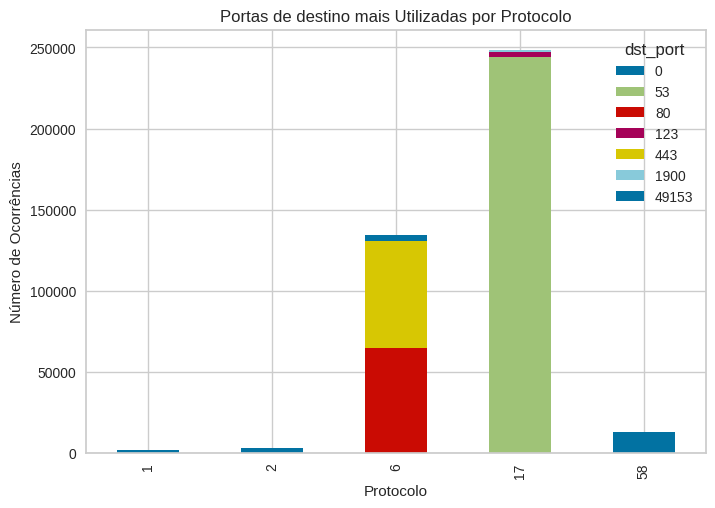

In [ ]:
# Contar o número de vezes que cada porta foi usada para cada protocolo
counts1 = dados.groupby(['protocol', 'dst_port']).size().reset_index(name='count')

# Ordenar os dados pela contagem decrescente
counts1 = counts1.sort_values(['protocol', 'count'], ascending=[True, False])

# Selecionar as 3 portas mais utilizadas por cada protocolo
top_ports1 = counts1.groupby('protocol').head(3)

# Gerar o gráfico de barras empilhadas
fig, ax = plt.subplots()
top_ports1.pivot(index='protocol', columns='dst_port', values='count').plot(kind='bar', stacked=True, ax=ax)



# Personalizar o gráfico
ax.set_title('Portas de destino mais Utilizadas por Protocolo')
ax.set_xlabel('Protocolo')
ax.set_ylabel('Número de Ocorrências')

# Mostrar o gráfico
plt.show()

Vamos analisar melhor os dados faltantes

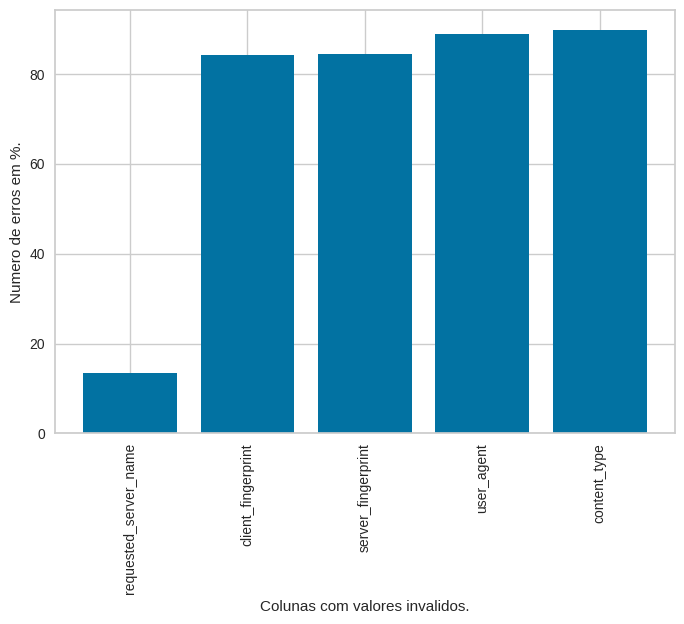

In [ ]:
# obtém o número de pontos de dados ausentes por coluna
data_cols_erros = dados.isnull().sum()

# filtrando someste os que tem valores nulos > 0
data_cols_erros = data_cols_erros[data_cols_erros > 0]

size = len(dados.index)

# obtendo uma lista das colunas
cols_name = data_cols_erros.index.tolist()

# obtendo os uma lista com a porcentagem dos erros para cada coluna
erros = [float((item / size) * 100) for item in data_cols_erros.values.tolist()]

plt.bar(cols_name, erros)

plt.xlabel("Colunas com valores invalidos.")
plt.ylabel("Numero de erros em %.")

plt.xticks(rotation = 90)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

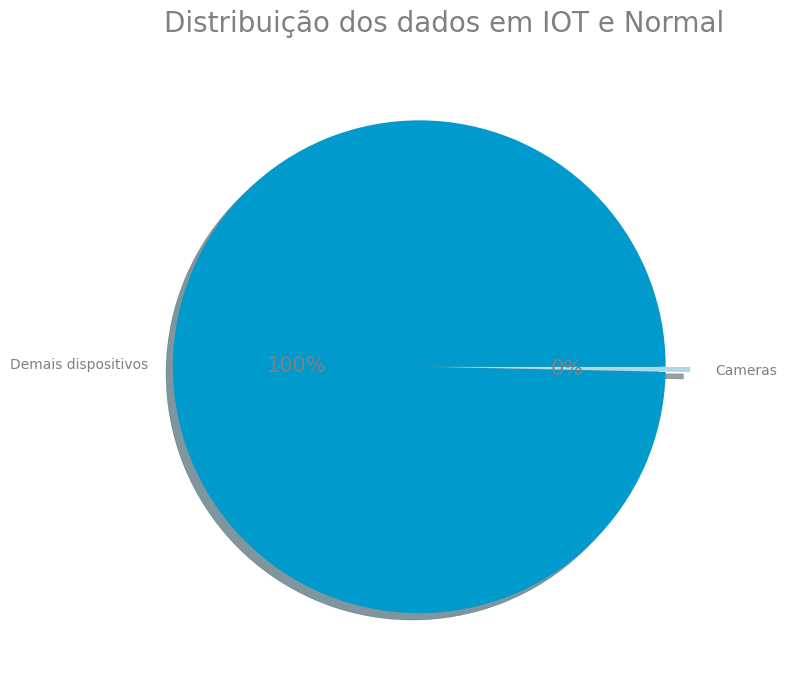

In [ ]:
plt.figure(figsize=(10,8))

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'gray'
plt.rcParams['axes.labelcolor']= 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['font.size']=15

cores= ['#009ACD', '#ADD8E6']

percentages = [item / dados.shape[0] for item in dados['label'].value_counts()]

labelss = list(dados['label'].value_counts().index.map({0:'Demais dispositivos',1:'Cameras'}))

explode=(0.1,0)

plt.pie(percentages, explode=explode,
       labels=labelss,
       colors = cores,
       autopct='%1.0f%%',
       shadow=True, startangle=0,
       pctdistance=0.5,labeldistance=1.1
    )

plt.title("Distribuição dos dados em IOT e Normal", fontsize=20, pad=20)

plt.show()

In [ ]:
# Obtendo colunas que temos valores unicos
Unicos = dados.nunique()

Unicos = Unicos[Unicos == 1]

Unicos

vlan_id                      1
bidirectional_cwr_packets    1
bidirectional_ece_packets    1
bidirectional_urg_packets    1
src2dst_cwr_packets          1
src2dst_ece_packets          1
src2dst_urg_packets          1
dst2src_cwr_packets          1
dst2src_ece_packets          1
dst2src_urg_packets          1
dtype: int64

In [ ]:
tipos = dados.dtypes

tipos = tipos[tipos == object]

tipos

src_ip                       object
src_mac                      object
src_oui                      object
dst_ip                       object
dst_mac                      object
dst_oui                      object
application_name             object
application_category_name    object
requested_server_name        object
client_fingerprint           object
server_fingerprint           object
user_agent                   object
content_type                 object
dtype: object

## 3-Preparação

Epata em que prepararemos os dados para treinar nosso modelo.

Normalmente eu costumo fazer a filtragem remoção de colunas numéricas no final da etapa 3 para garantir que todos os dados categóricos em que eu não encontrei uma solução viável para transformá-los eu os removo, entretanto, pela natureza dos dados e como eu tenho que ver, as linhas que possuem valores nulos eu vou as remover e não quero que uma coluna que eu não vou usar tenha linhas com dados nulos e atrapalhe meu modelo.

In [ ]:
'''
colunas_numericas = dados.select_dtypes(include=['number']).columns

dados = dados[colunas_numericas]
'''


"\ncolunas_numericas = dados.select_dtypes(include=['number']).columns\n\ndados = dados[colunas_numericas]\n"

In [ ]:
# Obtendo o numero de ocorrencias de valores distintos
cardinalidade = dados.nunique()

# filtrando as colunas que possuiem cardinalidade maior que 1
cardinalidade = cardinalidade[cardinalidade > 1]

dados = dados[list(cardinalidade.index)]

dados

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,label
0,0,0,192.168.1.111,2c:6e:85:56:dd:b7,2c:6e:85,52754,239.255.255.250,01:00:5e:7f:ff:fa,01:00:5e,1900,...,SSDP,System,0,6,239.255.255.250:1900,NaN,NaN,NaN,NaN,0
1,1,0,192.168.1.111,2c:6e:85:56:dd:b7,2c:6e:85,5353,224.0.0.251,01:00:5e:00:00:fb,01:00:5e,5353,...,MDNS,Network,0,6,_googlecast._tcp.local,NaN,NaN,NaN,NaN,0
2,2,0,fe80::6529:a551:88b9:f0ca,2c:6e:85:56:dd:b7,2c:6e:85,5353,ff02::fb,33:33:00:00:00:fb,33:33:00,5353,...,MDNS,Network,0,6,_googlecast._tcp.local,NaN,NaN,NaN,NaN,0
3,3,0,192.168.1.191,60:6c:66:cb:78:61,60:6c:66,41081,192.168.33.254,00:13:33:b0:18:50,00:13:33,53,...,DNS,Network,0,6,mobile.slashdot.org,NaN,NaN,NaN,NaN,0
4,4,0,192.168.1.191,60:6c:66:cb:78:61,60:6c:66,49000,192.168.33.254,00:13:33:b0:18:50,00:13:33,53,...,DNS.Google,Network,0,6,accounts.google.com,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415016,74525,0,192.168.1.191,60:6c:66:cb:78:61,60:6c:66,54404,67.223.99.67,00:13:33:b0:18:50,00:13:33,443,...,TLS,Web,0,6,api.tineye.com,dda6c525431b3259dac349220160cdcb,573a9f3f80037fb40d481e2054def5bb,NaN,NaN,0
415017,74526,0,192.168.1.191,60:6c:66:cb:78:61,60:6c:66,58187,192.168.33.254,00:13:33:b0:18:50,00:13:33,53,...,DNS.Google,Network,0,6,fonts.gstatic.com,NaN,NaN,NaN,NaN,0
415018,74527,0,192.168.1.254,00:13:33:b0:18:50,00:13:33,52441,239.255.255.250,01:00:5e:7f:ff:fa,01:00:5e,1900,...,SSDP,System,0,6,239.255.255.250:1900,NaN,NaN,NaN,NaN,0
415019,74528,0,192.168.1.254,00:13:33:b0:18:50,00:13:33,53139,239.255.255.250,01:00:5e:7f:ff:fa,01:00:5e,1900,...,SSDP,System,0,6,239.255.255.250:1900,NaN,NaN,NaN,NaN,0


In [ ]:
# removendo 0 ou mais ocorrencias das colunas que possuem application no inicio -> application_name	application_category_name	application_is_guessed	application_confidence

# seleciona as colunas que começão com application para serem removidas
cols_to_drop = dados.filter(regex=r'^application_*')

try:
    # remove todas as colunas contidas na lista
    dados.drop(columns=['src_ip', 'dst_ip'] + list(cols_to_drop.columns), inplace=True)
except:
    print("já foi removido")

dados.head(10)


,id,expiration_id,src_mac,src_oui,src_port,dst_mac,dst_oui,dst_port,protocol,ip_version,...,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,label
0,0,0,2c:6e:85:56:dd:b7,2c:6e:85,52754,01:00:5e:7f:ff:fa,01:00:5e,1900,17,4,...,0,0,0,0,239.255.255.250:1900,NaN,NaN,NaN,NaN,0
1,1,0,2c:6e:85:56:dd:b7,2c:6e:85,5353,01:00:5e:00:00:fb,01:00:5e,5353,17,4,...,0,0,0,0,_googlecast._tcp.local,NaN,NaN,NaN,NaN,0
2,2,0,2c:6e:85:56:dd:b7,2c:6e:85,5353,33:33:00:00:00:fb,33:33:00,5353,17,6,...,0,0,0,0,_googlecast._tcp.local,NaN,NaN,NaN,NaN,0
3,3,0,60:6c:66:cb:78:61,60:6c:66,41081,00:13:33:b0:18:50,00:13:33,53,17,4,...,0,0,0,0,mobile.slashdot.org,NaN,NaN,NaN,NaN,0
4,4,0,60:6c:66:cb:78:61,60:6c:66,49000,00:13:33:b0:18:50,00:13:33,53,17,4,...,0,0,0,0,accounts.google.com,NaN,NaN,NaN,NaN,0
5,5,0,60:6c:66:cb:78:61,60:6c:66,47903,00:13:33:b0:18:50,00:13:33,53,17,4,...,0,0,0,0,mobile.backtrack-linux.org.lan,NaN,NaN,NaN,NaN,0
6,6,0,60:6c:66:cb:78:61,60:6c:66,42038,00:13:33:b0:18:50,00:13:33,53,17,4,...,0,0,0,0,download.aircrack-ng.org,NaN,NaN,NaN,NaN,0
7,7,0,60:6c:66:cb:78:61,60:6c:66,45989,00:13:33:b0:18:50,00:13:33,53,17,4,...,0,0,0,0,api.ipify.org,NaN,NaN,NaN,NaN,0
8,8,0,60:6c:66:cb:78:61,60:6c:66,60516,00:13:33:b0:18:50,00:13:33,53,17,4,...,0,0,0,0,aircrack-ng.org,NaN,NaN,NaN,NaN,0
9,9,0,d0:53:49:1b:0c:90,d0:53:49,546,33:33:00:01:00:02,33:33:00,547,17,6,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# obtendo a quantidade de linhas
limite = len(dados) / 2

# remove colunas que possuem mais de 50% de valores inválidos
dados.dropna(axis=1, thresh=limite, inplace=True)

# remove todas as linhas que possuem algum valor null or vazio
dados.dropna(axis=0, how='any', inplace=True)

dados.shape

(359377, 67)

In [ ]:
# Filtrar as primeiras 100.000 linhas onde label é igual a 1

df_label_1 = dados[dados['label'] == 1].head(1500)

# Filtrar as primeiras 100.000 linhas onde label é igual a 0
df_label_0 = dados[dados['label'] == 0].head(1500)

# Concatenar os DataFrames resultantes
dados = pd.concat([df_label_1, df_label_0])

dados.reset_index()
# Agora o result_df contém as 100.000 primeiras linhas com label 1 e as 100.000 primeiras linhas com label 0
dados

,id,expiration_id,src_mac,src_oui,src_port,dst_mac,dst_oui,dst_port,protocol,ip_version,...,src2dst_psh_packets,src2dst_rst_packets,src2dst_fin_packets,dst2src_syn_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,requested_server_name,label
270560,319,0,ec:1a:59:83:28:11,ec:1a:59,3344,00:16:6c:ab:6b:88,00:16:6c,49152,6,4,...,1,0,1,1,5,1,0,1,192.168.1.249,1
270562,321,0,ec:1a:59:83:28:11,ec:1a:59,3351,00:16:6c:ab:6b:88,00:16:6c,49152,6,4,...,1,0,1,1,5,1,0,1,192.168.1.249,1
270730,489,0,ec:1a:59:83:28:11,ec:1a:59,3666,00:16:6c:ab:6b:88,00:16:6c,49152,6,4,...,1,0,1,1,5,1,0,1,192.168.1.249,1
270731,490,0,ec:1a:59:83:28:11,ec:1a:59,3667,00:16:6c:ab:6b:88,00:16:6c,49152,6,4,...,1,0,1,1,5,1,0,1,192.168.1.249,1
270782,541,0,ec:1a:59:83:28:11,ec:1a:59,3973,00:16:6c:ab:6b:88,00:16:6c,49152,6,4,...,1,0,1,1,5,1,0,1,192.168.1.249,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1563,0,60:6c:66:cb:78:61,60:6c:66,52722,00:13:33:b0:18:50,00:13:33,443,6,4,...,2,0,1,1,10,2,0,1,x.bidswitch.net,0
1564,1564,0,60:6c:66:cb:78:61,60:6c:66,35700,00:13:33:b0:18:50,00:13:33,443,6,4,...,3,0,1,2,11,6,0,1,li.pxl.ace.advertising.com,0
1565,1565,0,60:6c:66:cb:78:61,60:6c:66,38762,00:13:33:b0:18:50,00:13:33,443,6,4,...,3,3,1,2,11,4,0,1,em.licasd.com,0
1566,1566,0,60:6c:66:cb:78:61,60:6c:66,46466,00:13:33:b0:18:50,00:13:33,443,6,4,...,2,3,1,1,8,3,0,1,match.adsrvr.org,0


In [ ]:
dados['label'].value_counts()

0    1500
1    1311
Name: label, dtype: int64

## 4- Modelagem

### Modelos

In [ ]:
import random

camera1 = family['Câmeras'][random.randint(0, 5)]
camera2 = family['Câmeras'][random.randint(0, 5)]

print(f"{camera1} e {camera2}")

30:8c:fb:b6:ea:45 e 00:16:6c:ab:6b:88


In [ ]:
# Split

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from yellowbrick.classifier.rocauc import roc_auc
import random

'''
teste_size = random.randrange(10, 40) / 100

data_x = dados.drop(columns=['label','id'])

data_y = dados['label']

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=teste_size, random_state=42)
'''
camera1 = family['Câmeras'][random.randint(0, 5)]
camera2 = family['Câmeras'][random.randint(0, 5)]

# Criar um DataFrame de teste com base nos endereços MAC desejados
test_x = dados[dados['src_mac'].isin([camera1]) & dados['dst_mac'].isin([camera1])]

test_y = test_x['label'].values

# Criar um DataFrame de treinamento excluindo os registros do conjunto de teste
train_x = dados[~dados.isin(test_x.index)]

train_y = test_x['label'].values

train_x = train_x.drop(columns=['label','id']).values

test_x = test_x.drop(columns=['label','id']).values

models = DataFrame() # onde serão quardadas as saidas

In [ ]:
colunas_numericas_train = train_x.select_dtypes(include=['number']).columns

train_x = train_x[colunas_numericas_train]

colunas_numericas_test = test_x.select_dtypes(include=['number']).columns

test_x = test_x[colunas_numericas_test]

* Selecionando as melhores variaveis reditores com o algoritmo [Boruta](https://medium.com/data-hackers/como-selecionar-melhores-vari%C3%A1veis-para-o-seu-modelo-com-boruta-ef7cbfb3fc35).

In [ ]:
# feature Selection

from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)

feat_selector.fit(train_x.values, train_y.values)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	51
Tentative: 	10
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	51
Tentative: 	10
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	51
Tentative: 	10
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	51
Tentative: 	10
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	54
Tentative: 	7
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	54
Tentative: 	7
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	54
Tentative: 	7
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	54
Tentative: 	7
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	56
Tentative: 	5
Rejected: 

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=220, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F8ADFA8D940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F8ADFA8D940, verbose=2)

In [ ]:
def plot_confusion_matrix (clf_name:str, y_true, y_pred, target_names = ['Não Sobrevivel', 'Sobrevivel']):

    cf_matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
    ax.set_title(clf_name)
    #ax.set_xlabel('Valores')
    #ax.set_ylabel('Valores')
    ax.xaxis.set_ticklabels(target_names)
    ax.yaxis.set_ticklabels(target_names)
    figure = ax.get_figure()

    figure.show()

In [ ]:
# filtrado as features relevantes selecionadas pelo boruta

train_x = train_x.iloc[:, feat_selector.support_.tolist()]

test_x = test_x.iloc[:, feat_selector.support_.tolist()]

In [ ]:
# FlorestaAleatória

from sklearn.ensemble import RandomForestClassifier

RFClf = RandomForestClassifier()

RFClf.fit(train_x, train_y)

rfclf_y = RFClf.predict(test_x)

models['RFClf'] = rfclf_y

ValueError: could not convert string to float: 'ec:1a:59:83:28:11'

In [ ]:
accuracy = accuracy_score(test_y, rfclf_y)

print(accuracy)

1.0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

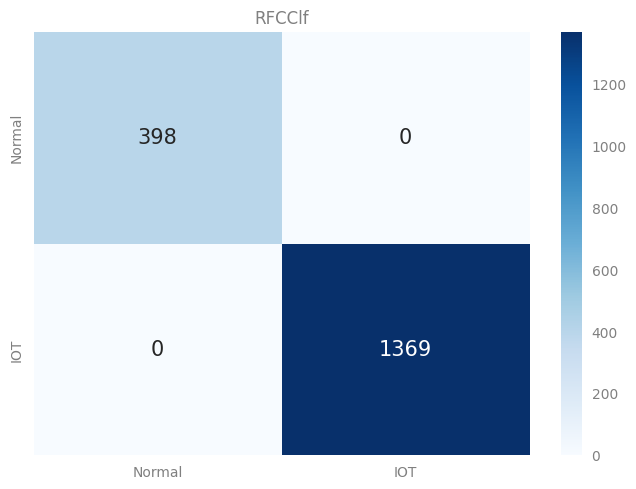

In [ ]:
plot_confusion_matrix('RFCClf', test_y, rfclf_y, ['Normal', 'IOT'])

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors=2)

Knn.fit(train_x, train_y)

knn_y = Knn.predict(test_x)

models['KNN'] = knn_y

In [ ]:
accuracy = accuracy_score(test_y, knn_y)

print(accuracy)

1.0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

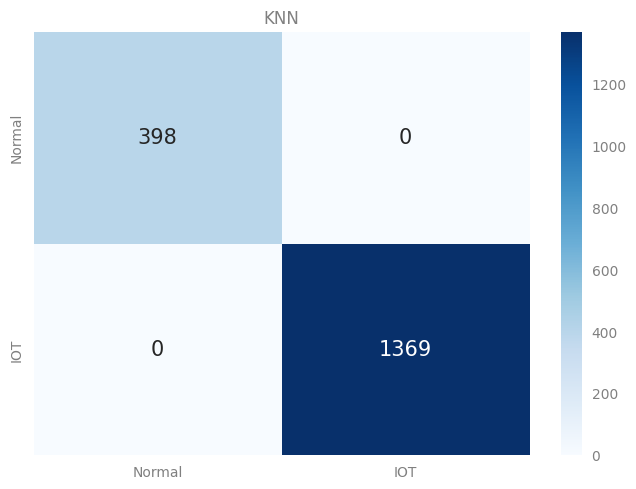

In [ ]:
plot_confusion_matrix('KNN', test_y, knn_y, ['Normal', 'IOT'])

In [ ]:
# XGBOOST

from xgboost import XGBClassifier

XGB = XGBClassifier()

XGB.fit(train_x, train_y)

xgb_y = XGB.predict(test_x)

models['XGB'] = xgb_y

In [ ]:
accuracy = accuracy_score(test_y, xgb_y)

print(accuracy)

1.0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
/tmp/ipykernel_6862/107582319.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the fol

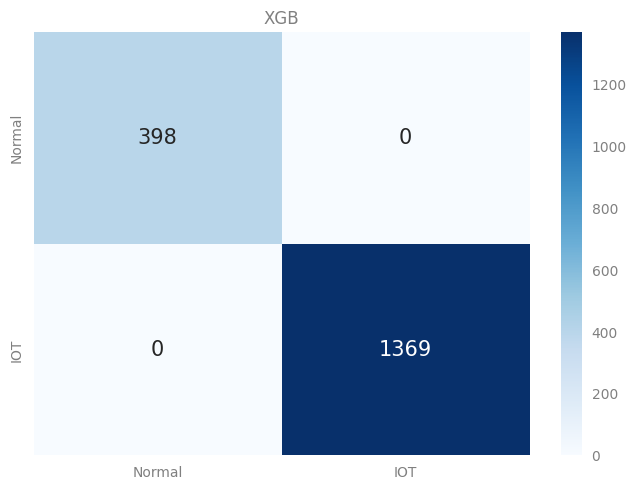

In [ ]:
plot_confusion_matrix('XGB', test_y, xgb_y, ['Normal', 'IOT'])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier



* HistGradientBoostingClassifier para substituir o lighgbm

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier



Referencia do modelo [catboost](https://catboost.ai/docs/)

In [ ]:
import catboost

CatBClf = catboost.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss')

CatBClf.fit(train_x, train_y, verbose=False)

cb_y = CatBClf.predict(test_x)

models['CB'] = cb_y

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [ ]:
accuracy = accuracy_score(test_y, cb_y)

accuracy

1.0

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

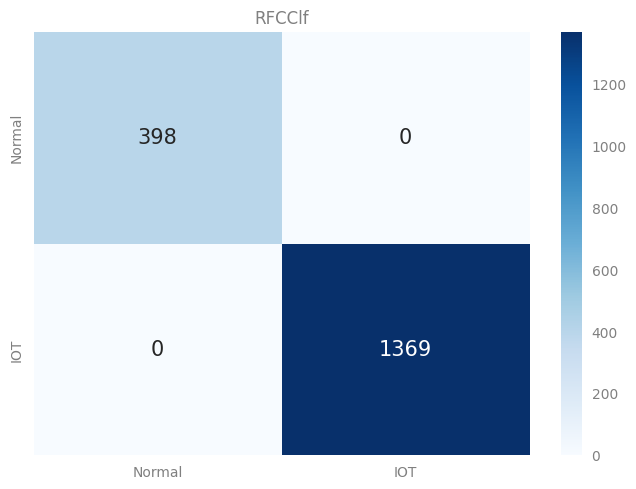

In [ ]:
plot_confusion_matrix('RFCClf', test_y, cb_y, ['Normal', 'IOT'])

In [ ]:
from sklearn.svm import SVC

SVClf = SVC()

SVClf.fit(train_x, train_y)

svc_y = SVClf.predict(test_x)

models['SVC'] = svc_y

In [ ]:
# ref -> https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
from sklearn.naive_bayes import GaussianNB

NBayes = GaussianNB()

NBayes.fit(train_x, train_y)

nb_y = NBayes.predict(test_x)

models['NBayes'] = nb_y

In [ ]:
def calculate_leaderboard (models:DataFrame) -> DataFrame:

    leaderboard = DataFrame(columns= list(models.columns))

    for col in list(leaderboard.columns):

        leaderboard.at['accuracy', col] = round(accuracy_score(test_y, np.array(models[col])) * 100, 4)

        matrix = confusion_matrix(test_y, np.array(models[col]))

        leaderboard.at['precision', col] = round(precision_score(test_y, np.array(models[col])) * 100, 4)

        leaderboard.at['recall', col] = round(recall_score(test_y, np.array(models[col])) * 100, 4)

        leaderboard.at['f1_score', col] = round(f1_score(test_y, np.array(models[col])) * 100, 4)

    leaderboard['mean all'] = [round(i, 4) for i in leaderboard.mean(axis=1).values]

    return leaderboard,

myleaderboard = calculate_leaderboard(models)

myleaderboard

(           RFClf    KNN    XGB     CB    SVC NBayes  mean all
 accuracy   100.0  100.0  100.0  100.0  100.0  100.0     100.0
 precision  100.0  100.0  100.0  100.0  100.0  100.0     100.0
 recall     100.0  100.0  100.0  100.0  100.0  100.0     100.0
 f1_score   100.0  100.0  100.0  100.0  100.0  100.0     100.0,)

In [ ]:
def plot_confusion_matrix (clf_name:str, y_true, y_pred, target_names = ['Não Sobrevivel', 'Sobrevivel']):

    cf_matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
    ax.set_title(clf_name)
    #ax.set_xlabel('Valores')
    #ax.set_ylabel('Valores')
    ax.xaxis.set_ticklabels(target_names)
    ax.yaxis.set_ticklabels(target_names)
    figure = ax.get_figure()

    figure.show()

Referências:
* [XGBClassifier](https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390),
[Refinando Hiperâmetros XGBClf](https://medium.com/@keler.yohan/como-refinar-os-hiper-par%C3%A2metros-de-um-modelo-xgboost-em-python-a096f6ca8f14)

* [area sobre a curva](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772)

* [Coeficiente kappa](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html#sklearn.metrics.cohen_kappa_score)



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, cohen_kappa_score, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

modelos = [
    (
        'RFClf',
        RandomForestClassifier(),
        {
            'n_estimators': [i for i in range(50, 1000, 50)],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'random_state':[0,42]
        }
    ),
    (
        'XGBoost',
        XGBClassifier(),
        {
            #'colsample_bytree': [i / 100 for i in range(3, 15, 1)],
            'eta': [i / 1000 for i in range(1, 100, 25)],
            'eval_metric': ['auc'],
            'max_depth': [i for i in range(5, 85, 5)],
            'min_child_weight': [i for i in range(15) ],
            'objective': ['binary:hinge'],
            'subsample': [i / 100 for i in range(3, 15, 1)],
            'booster':['gbtree','dart']
        }
    ),
    (
        'SVC',
        SVC(),
        [
            {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
            {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
        ]
    ),
    (
        'KNN',
        KNeighborsClassifier(),
        {
            'n_neighbors':[2],
        }
    ),
    (
        'Naive Baiyes',
        GaussianNB(),
        {

        }

    ),
    (
        'Cat boost',
        CatBoostClassifier(),
        {

        }
    ),
    (
        'Ligth GBM',
        HistGradientBoostingClassifier(),
        {
            'learning_rate':[.0001, .00025, .0005, .00075, .001, .0025, .0075, .01],
            'loss':['log_loss', 'auto', 'binary_crossentropy', 'categorical_crossentropy'],
            'max_iter':[i for i in range(100, 1000, 100)],
            'max_depth': [ i for i in range(30, 3, 87)],
            'max_leaf_nodes':[i for i in range(30, 80, 5)]
        }
    )
]

for name, clf, paramss in modelos:

    algritm = RandomizedSearchCV(clf, paramss, cv = 5)

    algritm.fit(train_x, train_y)

    y_pred = algritm.predict(test_x)

    classification_report(test_y, y_pred)

/home/maycon/IC-RedesDomesticas/.env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/maycon/IC-RedesDomesticas/.env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/maycon/IC-RedesDomesticas/.env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Learning rate set to 0.023193
0:	learn: 0.6174467	total: 95.6ms	remaining: 1m 35s
1:	learn: 0.5457448	total: 122ms	remaining: 1m
2:	learn: 0.4783514	total: 153ms	remaining: 50.7s
3:	learn: 0.4226359	total: 175ms	remaining: 43.5s
4:	learn: 0.3717345	total: 189ms	remaining: 37.6s
5:	learn: 0.3278949	total: 202ms	remaining: 33.4s
6:	learn: 0.2913744	total: 214ms	remaining: 30.4s
7:	learn: 0.2595233	total: 226ms	remaining: 28.1s
8:	learn: 0.2341224	total: 239ms	remaining: 26.4s
9:	learn: 0.2067053	total: 252ms	remaining: 24.9s
10:	learn: 0.1825979	total: 265ms	remaining: 23.8s
11:	learn: 0.1620558	total: 289ms	remaining: 23.8s
12:	learn: 0.1452308	total: 305ms	remaining: 23.2s
13:	learn: 0.1292698	total: 320ms	remaining: 22.5s
14:	learn: 0.1159929	total: 336ms	remaining: 22.1s
15:	learn: 0.1029992	total: 349ms	remaining: 21.4s
16:	learn: 0.0924005	total: 361ms	remaining: 20.9s
17:	learn: 0.0820655	total: 374ms	remaining: 20.4s
18:	learn: 0.0736574	total: 387ms	remaining: 20s
19:	learn: 0.0

ValueError: Parameter grid for parameter 'max_depth' need to be a non-empty sequence, got: []